## PCA
** Анализ главных компонент ** (principal component analysis, PCA) - метод линейного преобразования, относящийся к типу обучения без учителя, который широко используется в самых разных областях, чаще всего для снижения зармерности. 

Шаги алгоритма PCA: 
1. стандартизировать $d$-мерный набор данных;
2. построить ковариационную матрицу;
3. разложить ковариационную матрицу на её собственные векторы и собственные числа;
4. выбрать $k$ собственных векторов, которые соответствуют $k$ самым большим собственным значениям, где $k$ - размерность нового подпространства признаков ($k \leq d$);
5. создать проекционную матрицу **W** из "верхних" $k$ векторов;
6. преобразовать $d$-мерный входной набор данных **X**, используя проекционную матрицу **W** для получения нового $k$-мерного подпространства признаков.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('../data/wine/wine.data', header=None)

X, y = df.iloc[:, 1:].values, df.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)

После стандартизации, нужно построить ковариационную матрицу, в которой хранятся попарные ковариации признаков. Например, ковариацию между двумя признаками $x_j$ и $x_k$ на уровне генеральной совокупности можно вычислить как:
$$ \sigma_{jk} = \frac{1}{n}\sum_{i=1}^n (x_j^{(i)} - \mu_j)(x_k^{(i)} - \mu_k) $$
где $\mu_j$ и $\mu_k$ - это эмпирические средние соответсвенно признаков $j$ и $k$. Отметим, что если набор данных стандартизирован, эмпирические средние равны нулю. 

In [3]:
# получим собственные пары ковариационной матрицы
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("\nСобственные значения \n{0}".format(eigen_vals))


Собственные значения 
[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


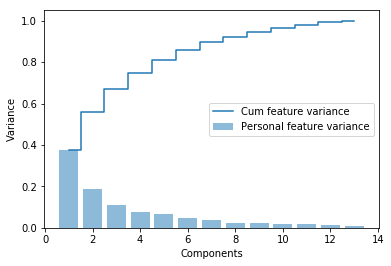

In [4]:
# построим график долей объясненной дисперсии
total = sum(eigen_vals)
var_exp = [(i / total) for i in
           sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
plt.bar(range(1, 14), var_exp, alpha=.5, align='center',
        label='Personal feature variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='Cum feature variance')
plt.ylabel('Variance')
plt.xlabel('Components')
plt.legend(loc='best')
plt.show()

In [5]:
# отсортируем собственные пары в порядке убывания собственных значений
eigen_pars = [(np.abs(eigen_vals[i]), eigen_vecs[:, i]) for i in range(len(eigen_vals))]
eigen_pars.sort(reverse=True)

In [6]:
w = np.hstack((eigen_pars[0][1][:, np.newaxis],
               eigen_pars[1][1][:, np.newaxis]))
print('W Matrix:\n', w)

W Matrix:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


In [7]:
X_train_std[0].dot(w)

array([2.59891628, 0.00484089])

In [8]:
X_train_pca = X_train_std.dot(w)

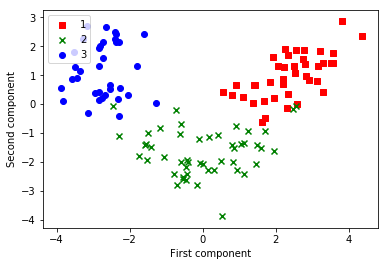

In [9]:
colors = ['r', 'g', 'b']
markers = ['s', 'x', 'o']
for label, color, marker in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == label, 0],
                X_train_pca[y_train == label, 1],
                c=color, marker=marker, label=label)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.legend(loc='upper left')
plt.show()

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from mutils import plot_decision_regions

/Users/tbb/Virtualenvs/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/tbb/Virtualenvs/venv/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the 

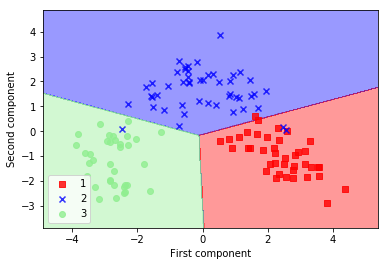

In [11]:
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, clf=lr)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.legend(loc='lower left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


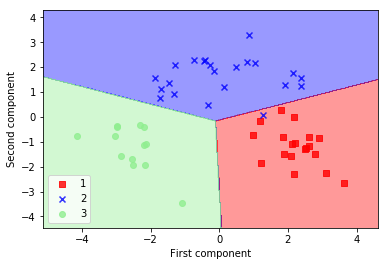

In [12]:
plot_decision_regions(X_test_pca, y_test, clf=lr)
plt.xlabel('First component')
plt.ylabel('Second component')
plt.legend(loc='lower left')
plt.show()

In [13]:
pca = PCA()
X_train_pca = pca.fit_transform(X_train_std)
pca.explained_variance_ratio_

array([0.37329648, 0.18818926, 0.10896791, 0.07724389, 0.06478595,
       0.04592014, 0.03986936, 0.02521914, 0.02258181, 0.01830924,
       0.01635336, 0.01284271, 0.00642076])